In [1]:
#main
import pandas as pd
import numpy as np
import math
import sklearn
import pickle

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#specific
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#options
pd.set_option('display.max_columns', None) #show all the columns
pd.set_option('display.max_rows', None) #show all the rows


# Load the data

In [2]:
movies = pd.read_csv('./movies_treated.csv')


In [3]:
movies.dtypes

Unnamed: 0                                     int64
title                                         object
movie_id                                      object
movie_imdb_link                               object
certificate                                   object
runtime_in_mins                              float64
genre                                         object
imdb_rating                                  float64
number_of_votes                                int64
metascore                                      int64
top_director                                  object
release_year                                   int64
awards_link                                   object
awards_total                                  object
top_writer                                    object
top_star_1                                    object
top_star_2                                    object
top_star_3                                    object
num_user_reviews                             f

In [4]:
movies.isna().sum().sum()

0

In [5]:
cols_object = ['release_year','release_month', 'release_weekday']

movies[cols_object] = movies[cols_object].astype(object)

In [6]:
movies.isna().sum().sum()

0

In [7]:
movies.shape

(893, 47)

In [8]:
movies.head(2)

,Unnamed: 0,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director,top_production_company_grouped,country_of_origin_grouped
0,0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,N,N,Columbia Pictures,United States
1,1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y,Warner Bros.,Other


In [9]:
movies.columns

Index(['Unnamed: 0', 'title', 'movie_id', 'movie_imdb_link', 'certificate',
       'runtime_in_mins', 'genre', 'imdb_rating', 'number_of_votes',
       'metascore', 'top_director', 'release_year', 'awards_link',
       'awards_total', 'top_writer', 'top_star_1', 'top_star_2', 'top_star_3',
       'num_user_reviews', 'num_critic_reviews', 'release_date',
       'country_of_origin', 'top_production_company', 'budget_in_usd',
       'opening_weekend_us_can_in_usd', 'gross_us_can_in_usd',
       'gross_worldwide_in_usd', 'total_award_nominations', 'total_award_wins',
       'primary_genre', 'secondary_genre', 'release_weekday', 'release_month',
       'oscar_win', 'oscar_nomination', 'total_oscar_wins_top_star_1',
       'total_oscar_nominations_top_star_1', 'total_oscar_wins_top_star_2',
       'total_oscar_nominations_top_star_2', 'total_oscar_wins_top_star_3',
       'total_oscar_nominations_top_star_3', 'summed_oscar_wins_stars',
       'summed_oscar_nominations_stars',
       'stars_o

# Pre-model steps

## Check multicollinearity

In [10]:
numericals_df=movies.select_dtypes(np.number)
categoricals_df=movies.select_dtypes(object)


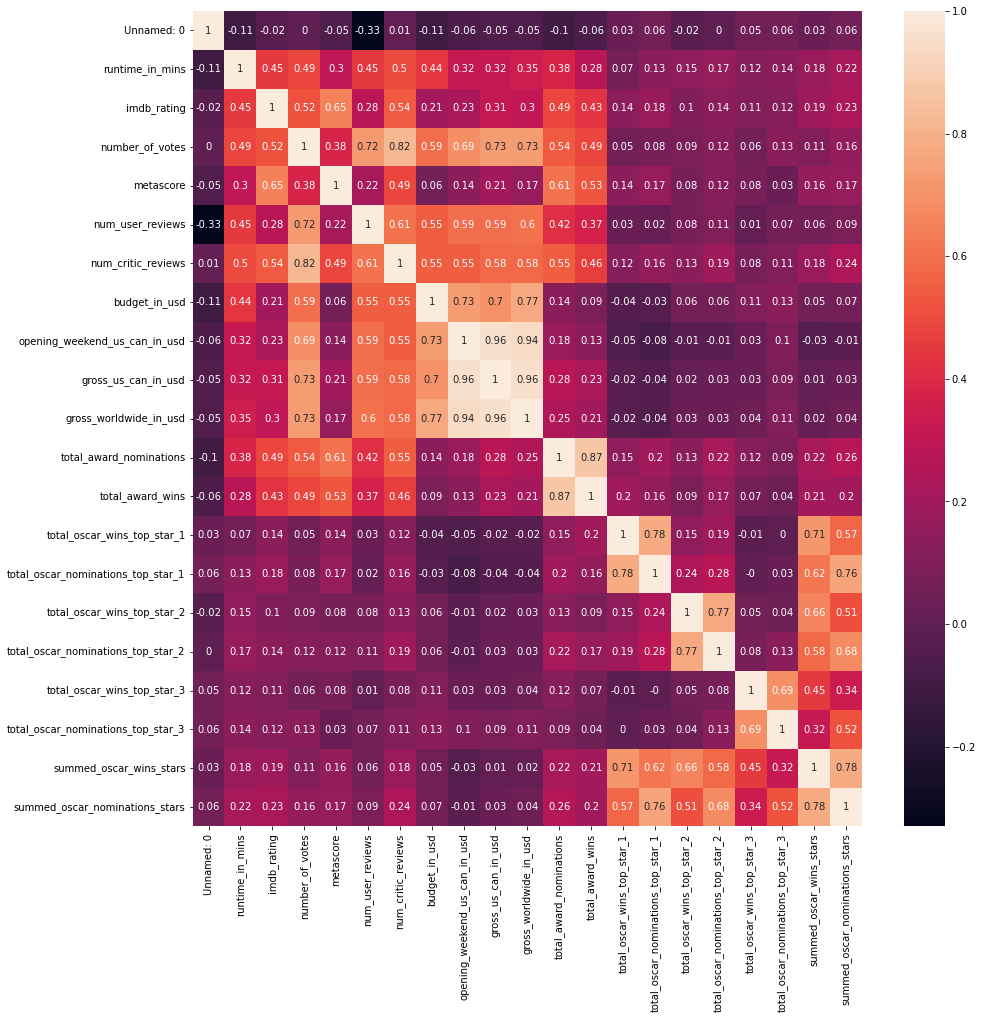

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) #First we have to use plt.subplots to create plot environment.
ax=sns.heatmap(round(numericals_df.corr(),2), annot=True)
plt.show()

## X-y split

In [12]:
X = movies[['runtime_in_mins','imdb_rating', 'number_of_votes','metascore',
       'num_user_reviews', 'num_critic_reviews','budget_in_usd', 'total_award_nominations', 'total_award_wins',
       'primary_genre', 'secondary_genre', 'release_weekday', 'release_month','is_among_best_director',
       'top_production_company_grouped', 'country_of_origin_grouped']]

y= movies['gross_worldwide_in_usd']

display(y.shape)
display(X.shape)

(893,)

(893, 16)

In [13]:
X.isna().sum().sum()

0

In [14]:
X_corr = movies[['runtime_in_mins','imdb_rating', 'number_of_votes','metascore',
       'num_user_reviews', 'num_critic_reviews','budget_in_usd', 'total_award_nominations', 'total_award_wins',
        'summed_oscar_wins_stars','summed_oscar_nominations_stars',
       'gross_worldwide_in_usd']]

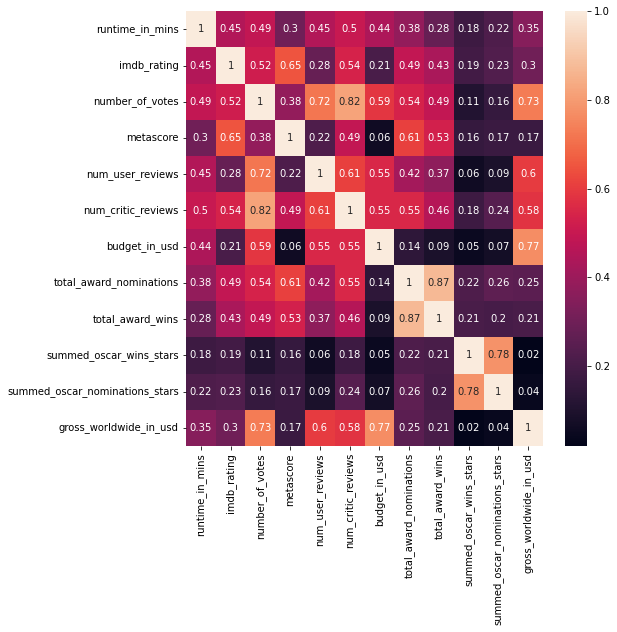

In [15]:
fig, ax = plt.subplots(figsize=(8,8)) #First we have to use plt.subplots to create plot environment.
ax=sns.heatmap(round(X_corr.corr(),2), annot=True)
plt.show()

## Train - test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Numerical Categorical Split

In [17]:
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

# Model

## Model Selection Pipeline

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [19]:

# First, create a DataFrame to monitor the metrics and improvement of each model
prediction_scores = pd.DataFrame(columns=['Method', 'Round','MAE','MSE','RMSE','R2','R2_adj','Notes'])


In [20]:
# Define a function of models pipeline to try various regressors

def model_predict(X_train, X_test, y_train, y_test, pred_scores, m=0, k=0, describe='No D'):
    
    ################# LinearRegression() ##########################
    lin_reg = linear_model.LinearRegression().fit(X_train,y_train)
    
    lin_reg_predictions = lin_reg.predict(X_test)
    
    pickle.dump(lin_reg,open(f'LinearRegression_{m}.p', 'wb'))

    
    ################## KNeighborsRegressor() ######################
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
                                 
    knn_reg_predictions = knn_reg.predict(X_test)
    
    pickle.dump(knn_reg,open(f'KNeighborsRegressor_{m}.p', 'wb'))
    
    
    ################## DecisionTreeRegressor() #####################
    dt_reg= DecisionTreeRegressor()
    
    ### Grid Search for Hyperparameter Optimization
    
    # Values to be explored for each parameter
    max_depth_choices= [3,4,5,6,7,8,9,10,None]
    criterion_choices = ['squared_error','friedman_mse','absolute_error', 'poisson']
    min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
    min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
    max_features_choices = [2,3,4,5,6]

    grid = {'max_depth': max_depth_choices,
            'criterion': criterion_choices,
            'min_samples_split': min_samples_split_choices,
            'min_samples_leaf': min_samples_leaf_choices,
            'max_features': max_features_choices}

    dt_model = GridSearchCV(estimator = dt_reg,
                                     param_grid = grid,
                                     cv = 5, n_jobs = -1)

        
    dt_model.fit(X_train,y_train) # In this line we actually build the model
    dt_predictions= dt_model.predict(X_test)
    
    pickle.dump(dt_model,open(f'DecisionTreeRegressor_{m}.p', 'wb'))
    
    #################### RandomForestRegressor() ###################
    rf_reg= RandomForestRegressor()
    
    ### Random Search for Hyperparameter Optimization

    rf_model = GridSearchCV(estimator = rf_reg,
                                     param_grid = grid,
                                     cv = 5, n_jobs = -1)

    rf_model.fit(X_train,y_train) # In this line we actually build the model
    rf_predictions = rf_model.predict(X_test)
    
    pickle.dump(rf_model,open(f'RandomForestRegressor_{m}.p', 'wb'))
    
    ################### METRICS ###################################

    model_list = [lin_reg, knn_reg, dt_model, rf_model]
    predictions_list = [lin_reg_predictions, knn_reg_predictions, dt_predictions, rf_predictions]
    label_list = ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor']
    
    MAE_list = []
    MSE_list = []
    RMSE_list = []
    R2_list = []
    adj_R2_list = []
    
    for i in range(len(model_list)):
        MAE = mean_absolute_error(y_test,predictions_list[i])
        MAE_list.append(MAE)
        
        MSE = mean_squared_error(y_test,predictions_list[i])
        MSE_list.append(MSE)
        
        RMSE = np.sqrt(MSE)
        RMSE_list.append(RMSE)
        
        R2 = r2_score(y_test,predictions_list[i])
        R2_list.append(R2)
        
        adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        adj_R2_list.append(adj_R2)
        
        dict_metrics = {'Method': label_list[i],
                        'Round': m,
                        'MAE': round(MAE),
                        'MSE': round(MSE),
                        'RMSE': round(RMSE),
                        'R2': round(R2,3),
                        'R2_adj': round(adj_R2,3),
                        'Notes': describe}
        
        pred_scores = pd.concat([pred_scores, pd.DataFrame([dict_metrics])], ignore_index=True)

    # display all metrics
    display(pred_scores)
    
    ############################ FIGURES #############################

    # Plot predicted vs. actual values
    ax, fig = plt.subplots(figsize=(15,10))
    alpha_all = 0.25    
    for i in range(len(predictions_list)):
        sns.regplot(x=predictions_list[i],y=y_test,scatter_kws={'alpha':alpha_all},label=label_list[i])
    plt.legend(loc='upper left',fontsize='large')
    plt.title('Model comparison')
    plt.xlabel('Actual gross (USD)')
    plt.ylabel('Predicted gross (USD)')
    plt.show()

    return pred_scores, model_list, predictions_list


## Models round 1: MinMaxScale & OneHotEncode

In [21]:
### Transformations

In [22]:
scaler = MinMaxScaler().fit(X_train_num)
encoder = OneHotEncoder().fit(X_train_cat)

pickle.dump(scaler,open('minmaxscaler_1.p', 'wb'))
pickle.dump(encoder,open('onehotencoder_1.p', 'wb'))

In [23]:
def transform(dataframe):
    # This function assumes that you have initialized a scaler and an encoder, based on the training data
    cat = dataframe.select_dtypes(include = object)
    num = dataframe.select_dtypes(include = np.number)

    if not cat.empty:
        cat_transformed = encoder.transform(cat)
        cat_transformed = cat_transformed.toarray()
        cat_new = pd.DataFrame(data = cat_transformed, columns = encoder.get_feature_names_out())
    else: 
        cat_new = cat
    
    if not num.empty:
        num_transformed = scaler.transform(num)
        num_new = pd.DataFrame(data = num_transformed, columns = num.columns)
    else:
        num_new = num
    
    return pd.concat([cat_new, num_new], axis = 1)


In [24]:
X_train_minmax_onehot = transform(X_train)
X_test_minmax_onehot = transform(X_test)

In [25]:
X_train_minmax_onehot.isna().sum().sum()

0

In [26]:
X_train_minmax_onehot.head(3)

,primary_genre_Action,primary_genre_Adventure,primary_genre_Animation,primary_genre_Biography,primary_genre_Comedy,primary_genre_Crime,primary_genre_Drama,primary_genre_Horror,primary_genre_Other,secondary_genre_Adventure,secondary_genre_Comedy,secondary_genre_Crime,secondary_genre_Drama,secondary_genre_Horror,secondary_genre_Other,secondary_genre_Romance,secondary_genre_Thriller,release_weekday_1,release_weekday_2,release_weekday_3,release_weekday_4,release_weekday_5,release_weekday_6,release_weekday_7,release_month_1.0,release_month_2.0,release_month_3.0,release_month_4.0,release_month_5.0,release_month_6.0,release_month_7.0,release_month_8.0,release_month_9.0,release_month_10.0,release_month_11.0,release_month_12.0,is_among_best_director_N,is_among_best_director_Y,top_production_company_grouped_Columbia Pictures,top_production_company_grouped_Other,top_production_company_grouped_Paramount Pictures,top_production_company_grouped_Universal Pictures,top_production_company_grouped_Warner Bros.,country_of_origin_grouped_Other,country_of_origin_grouped_United States,runtime_in_mins,imdb_rating,number_of_votes,metascore,num_user_reviews,num_critic_reviews,budget_in_usd,total_award_nominations,total_award_wins
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.415094,0.793651,0.038818,0.865169,0.028233,0.323111,0.033681,0.501312,0.421260
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.292453,0.841270,0.220519,0.752809,0.056377,0.506024,0.491559,0.144357,0.129921
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.311321,0.714286,0.006784,0.471910,0.010620,0.038335,0.014017,0.013123,0.019685


In [27]:
X_train_minmax_onehot.shape

(714, 54)

In [28]:
### Choosing k for KNeighborsRegressor()

In [29]:
scores = []

for k in range(2,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_minmax_onehot, y_train)
    scores.append(model.score(X_test_minmax_onehot, y_test))


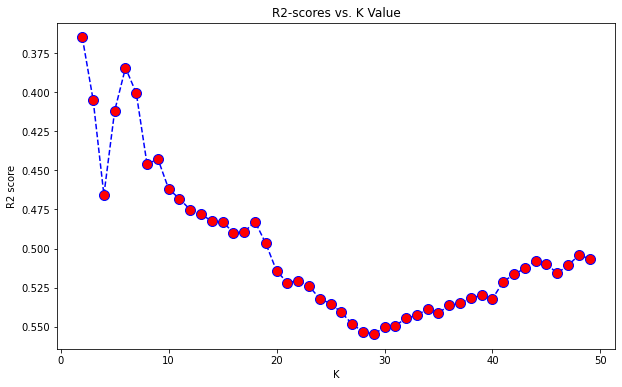

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('R2 score')
plt.show()

# rule of thumb in choosing the number of k-neighbours:

#  we choose the 'elbow point' on this graph. That gives a pretty good variance-bias trade-off. 
# There is not much gain after that.

In [31]:
scores

[0.3649060186740857,
 0.40474461802461537,
 0.46565044217921947,
 0.41177996529942595,
 0.3843202588850039,
 0.40053799022990855,
 0.44617012426326996,
 0.44257489223108337,
 0.461852316970933,
 0.4681192479938239,
 0.47519732897574474,
 0.47794917465515596,
 0.4825207688463372,
 0.482796355699463,
 0.48993368111603375,
 0.4893863873793082,
 0.48272607685579694,
 0.4967369478033157,
 0.5143031592523719,
 0.5218689772467793,
 0.5204782790639632,
 0.5239455417719754,
 0.5321152908012473,
 0.5352166843650258,
 0.5408072380172503,
 0.548348224140946,
 0.5532295986656097,
 0.5546668686890229,
 0.5505189978470267,
 0.5492938030025307,
 0.5446719399089102,
 0.5427271086563602,
 0.5385460490391394,
 0.5411441309164671,
 0.5363992987173913,
 0.5351551669160592,
 0.5316486733569867,
 0.5299815479738449,
 0.5321314195814566,
 0.5212091763270796,
 0.5164644694959427,
 0.5127435817980052,
 0.5077440166695624,
 0.5099113601378025,
 0.5157366136767815,
 0.5107971090908113,
 0.5042408330423357,
 0.506

In [32]:
scores.index(0.5532295986656097) # 28 neighbours for KNN regressor

26

,Method,Round,MAE,MSE,RMSE,R2,R2_adj,Notes
0,LinearRegression,1,89866220,22862766785281220,151204387,0.637,0.479,MinMaxScaler
1,KNeighborsRegressor,1,92819625,28144132114586728,167762130,0.553,0.359,MinMaxScaler
2,DecisionTreeRegressor,1,93243351,38946590644446600,197348906,0.382,0.113,MinMaxScaler
3,RandomForestRegressor,1,74945733,21130919519642872,145364781,0.665,0.518,MinMaxScaler


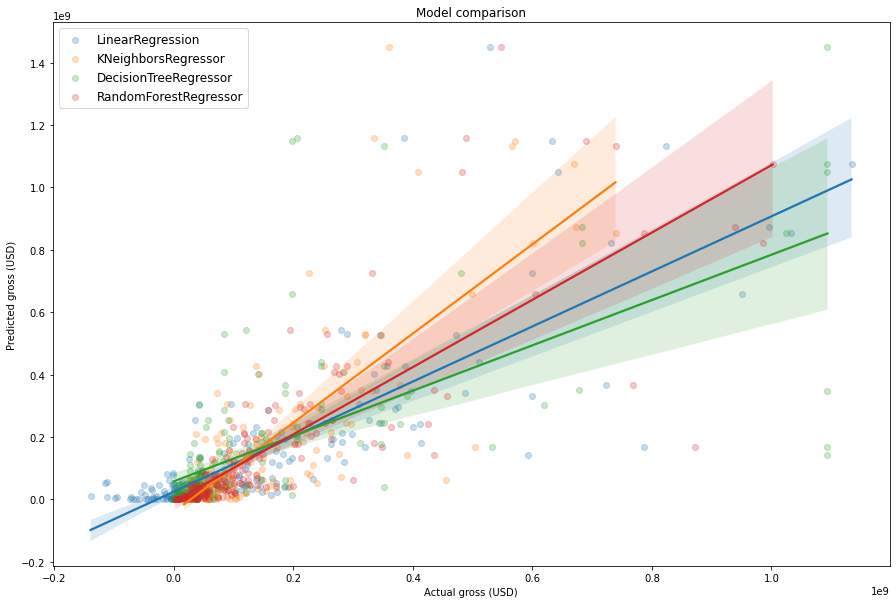

In [33]:
############# MODEL round 1 ###########

# set model number
m_num = 1

# describe the specifics

desc = 'MinMaxScaler'

# run the model pipeline
prediction_scores, models_round_1, predictions_round_1 = model_predict(X_train_minmax_onehot,
                                                                       X_test_minmax_onehot,
                                                                       y_train,
                                                                       y_test,
                                                                       pred_scores=prediction_scores,
                                                                       m=m_num,
                                                                       k= 28,
                                                                       describe=desc)


## Models round 2: StandardScaler & OneHotEncoder

In [34]:
scaler = StandardScaler().fit(X_train_num)
encoder = OneHotEncoder().fit(X_train_cat)

pickle.dump(scaler,open('standardscaler_2.p', 'wb'))
pickle.dump(encoder,open('onehotencoder_2.p', 'wb'))

In [35]:
def transform(dataframe):
    # This function assumes that you have initialized a scaler and an encoder, based on the training data
    cat = dataframe.select_dtypes(include = object)
    num = dataframe.select_dtypes(include = np.number)

    if not cat.empty:
        cat_transformed = encoder.transform(cat)
        cat_transformed = cat_transformed.toarray()
        cat_new = pd.DataFrame(data = cat_transformed, columns = encoder.get_feature_names_out())
    else: 
        cat_new = cat
    
    if not num.empty:
        num_transformed = scaler.transform(num)
        num_new = pd.DataFrame(data = num_transformed, columns = num.columns)
    else:
        num_new = num
    
    return pd.concat([cat_new, num_new], axis = 1)


In [36]:
X_train_standard_onehot = transform(X_train)
X_test_standard_onehot = transform(X_test)

In [37]:
X_train_standard_onehot.isna().sum().sum()

0

In [38]:
# Choosing k for KNeighborsRegressor()

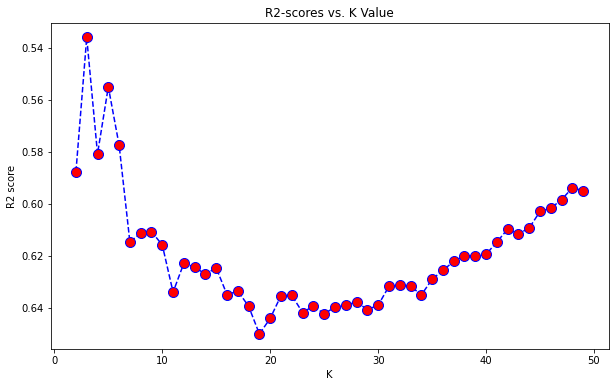

In [39]:
scores = []

for k in range(2,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_standard_onehot, y_train)
    scores.append(model.score(X_test_standard_onehot, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('R2 score')
plt.show()

# rule of thumb in choosing the number of k-neighbours:

#  we choose the 'elbow point' on this graph. That gives a pretty good variance-bias trade-off. 
# There is not much gain after that.

In [40]:
scores

[0.5876903395634642,
 0.5360644897212302,
 0.580827708381429,
 0.5550622426431402,
 0.5774808897122645,
 0.6147688837246509,
 0.6112594339603501,
 0.6107024090350575,
 0.6158738749039439,
 0.6340047375338913,
 0.6228632253898795,
 0.6244474497301723,
 0.6270256997840357,
 0.6247137746927813,
 0.6350139116969163,
 0.6335658256445205,
 0.6394537712637685,
 0.6500892964267124,
 0.6440812148944502,
 0.6353348303064664,
 0.6352597926528727,
 0.641846851026947,
 0.6393349319334448,
 0.6423568237527117,
 0.639740834810925,
 0.6391000676329921,
 0.6377521879952801,
 0.6407150469371767,
 0.6390448604989698,
 0.6317822452267662,
 0.6313099692005493,
 0.6316377279414469,
 0.6350936650529515,
 0.6290444183025206,
 0.625619282201809,
 0.6221967918739262,
 0.6200034275608111,
 0.6200449177383993,
 0.6194705820323729,
 0.6147047814852247,
 0.609778067179777,
 0.6116153303462749,
 0.6093083102848331,
 0.6029659404017662,
 0.601728110754028,
 0.5984023221273638,
 0.5938624414998057,
 0.5950019698452992

In [41]:
scores.index(0.6500892964267124) # 19 neighbours for KNN regressor

17

,Method,Round,MAE,MSE,RMSE,R2,R2_adj,Notes
0,LinearRegression,1,89866220,22862766785281220,151204387,0.637,0.479,MinMaxScaler
1,KNeighborsRegressor,1,92819625,28144132114586728,167762130,0.553,0.359,MinMaxScaler
2,DecisionTreeRegressor,1,93243351,38946590644446600,197348906,0.382,0.113,MinMaxScaler
3,RandomForestRegressor,1,74945733,21130919519642872,145364781,0.665,0.518,MinMaxScaler
4,LinearRegression,2,89856394,22865241880383384,151212572,0.637,0.479,StandardScaler
5,KNeighborsRegressor,2,71822912,22042492162106780,148467142,0.65,0.498,StandardScaler
6,DecisionTreeRegressor,2,105185263,39711633753790496,199277780,0.37,0.095,StandardScaler
7,RandomForestRegressor,2,72736176,21339437203624056,146080242,0.661,0.514,StandardScaler


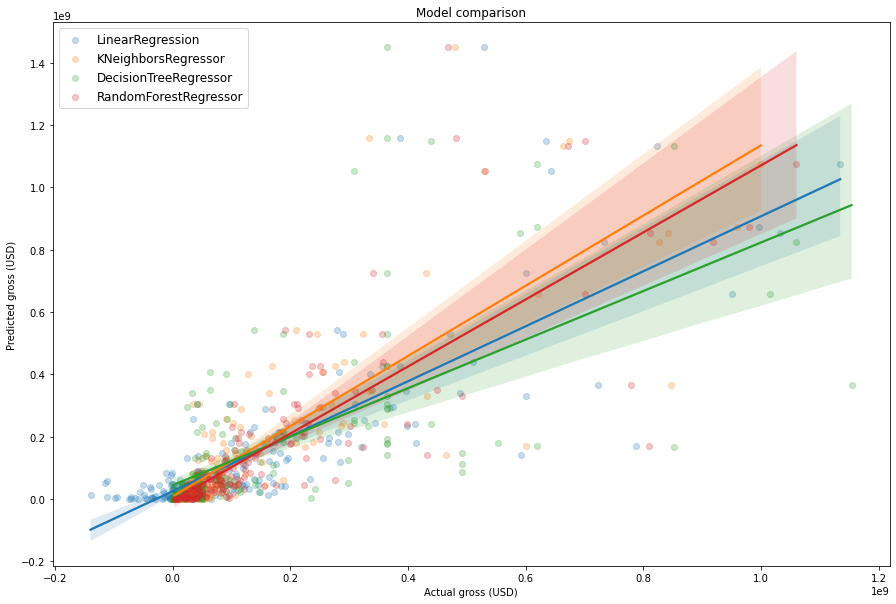

In [42]:
############# MODEL round 2 ###########

# set model number
m_num = 2

# describe the specifics

desc = 'StandardScaler'

# run the model pipeline
prediction_scores, models_round_2, predictions_round_2 = model_predict(X_train_standard_onehot,
                                                                       X_test_standard_onehot,
                                                                       y_train,
                                                                       y_test,
                                                                       pred_scores=prediction_scores,
                                                                       m=m_num,
                                                                       k= 19,
                                                                       describe=desc)


## Models round 3: LogTransformation & MinMaxScaler & OneHotEncoder

C:\Users\ecyildirim\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


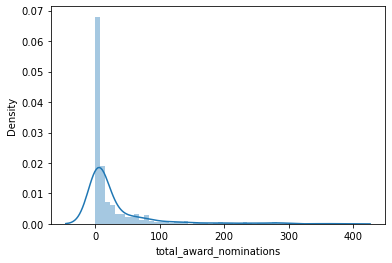

In [43]:
sns.distplot(X_train_num['total_award_nominations'])
plt.show()

In [44]:
display(X_train_num.head(3))
display(X_test_num.head(3))

,runtime_in_mins,imdb_rating,number_of_votes,metascore,num_user_reviews,num_critic_reviews,budget_in_usd,total_award_nominations,total_award_wins
331,119.0,7.1,49051,87,320.0,295.0,12000000.0,191.0,107.0
734,106.0,7.4,277665,77,638.0,462.0,175000000.0,55.0,33.0
382,108.0,6.6,8747,52,121.0,35.0,5000000.0,5.0,5.0


,runtime_in_mins,imdb_rating,number_of_votes,metascore,num_user_reviews,num_critic_reviews,budget_in_usd,total_award_nominations,total_award_wins
710,75.0,4.1,852,55,12.0,21.0,750000.0,0.0,0.0
440,116.0,7.2,151467,83,515.0,450.0,50000000.0,114.0,21.0
525,91.0,4.3,9401,39,151.0,66.0,22000000.0,1.0,0.0


In [45]:
def log_transfom(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later


In [46]:
columns_to_log = ['imdb_rating', 'number_of_votes', 'num_user_reviews', 'num_critic_reviews', 'budget_in_usd',
                 'total_award_nominations', 'total_award_wins' ]

In [47]:
with open('columns_to_log.p', 'wb') as f:
    pickle.dump(columns_to_log, f)

In [48]:
for column in columns_to_log:
    X_train_num[column] = list(map(log_transfom, X_train_num[column]))
    X_test_num[column] = list(map(log_transfom, X_test_num[column]))
    

C:\Users\ecyildirim\AppData\Local\Temp\ipykernel_13468\306970756.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [49]:
X_train_num.isna().sum().sum()

307

In [50]:
X_test_num.isna().sum().sum()

70

In [51]:
for column in columns_to_log:
    X_train_num[column] = X_train_num[column].fillna(np.mean(X_train_num[column]))
    X_test_num[column] = X_test_num[column].fillna(np.mean(X_test_num[column]))

In [52]:
X_train_num.isna().sum().sum()

0

In [53]:
X_test_num.isna().sum().sum()

0

In [54]:
display(X_train_num.head(3))
display(X_test_num.head(3))

,runtime_in_mins,imdb_rating,number_of_votes,metascore,num_user_reviews,num_critic_reviews,budget_in_usd,total_award_nominations,total_award_wins
331,119.0,0.851258,4.690648,87,2.505150,2.469822,7.079181,2.281033,2.029384
734,106.0,0.869232,5.443521,77,2.804821,2.664642,8.243038,1.740363,1.518514
382,108.0,0.819544,3.941859,52,2.082785,1.544068,6.698970,0.698970,0.698970


,runtime_in_mins,imdb_rating,number_of_votes,metascore,num_user_reviews,num_critic_reviews,budget_in_usd,total_award_nominations,total_award_wins
710,75.0,0.612784,2.930440,55,1.079181,1.322219,5.875061,0.995339,0.587576
440,116.0,0.857332,5.180318,83,2.711807,2.653213,7.698970,2.056905,1.322219
525,91.0,0.633468,3.973174,39,2.178977,1.819544,7.342423,0.000000,0.587576


C:\Users\ecyildirim\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


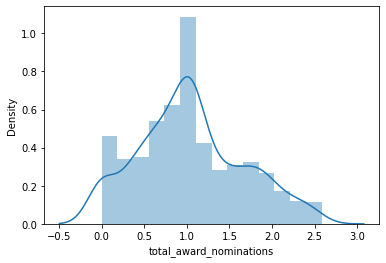

In [55]:
sns.distplot(X_train_num['total_award_nominations'])
plt.show()

In [56]:
X_train_log = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test_log = pd.concat([X_test_num, X_test_cat], axis = 1)

In [57]:
# MinMax

In [58]:
scaler = MinMaxScaler().fit(X_train_num)
encoder = OneHotEncoder().fit(X_train_cat)

In [59]:
pickle.dump(scaler,open('minmaxscaler_3.p', 'wb'))
pickle.dump(encoder,open('onehotencoder_3.p', 'wb'))

In [60]:
def transform(dataframe):
    # This function assumes that you have initialized a scaler and an encoder, based on the training data
    cat = dataframe.select_dtypes(include = object)
    num = dataframe.select_dtypes(include = np.number)

    if not cat.empty:
        cat_transformed = encoder.transform(cat)
        cat_transformed = cat_transformed.toarray()
        cat_new = pd.DataFrame(data = cat_transformed, columns = encoder.get_feature_names_out())
    else: 
        cat_new = cat
    
    if not num.empty:
        num_transformed = scaler.transform(num)
        num_new = pd.DataFrame(data = num_transformed, columns = num.columns)
    else:
        num_new = num
    
    return pd.concat([cat_new, num_new], axis = 1)


In [61]:
X_train_log_minmax_onehot = transform(X_train_log)
X_test_log_minmax_onehot = transform(X_test_log)

In [62]:
# Choosing k for KNeighborsRegressor()

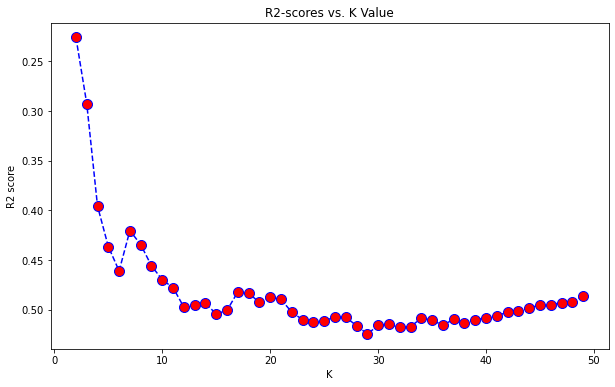

In [63]:
scores = []

for k in range(2,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_log_minmax_onehot, y_train)
    scores.append(model.score(X_test_log_minmax_onehot, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('R2 score')
plt.show()

# rule of thumb in choosing the number of k-neighbours:

#  we choose the 'elbow point' on this graph. That gives a pretty good variance-bias trade-off. 
# There is not much gain after that.

In [64]:
scores

[0.22601276610318677,
 0.29252116319337484,
 0.39579021946875037,
 0.4364718006540743,
 0.4610020174183028,
 0.42040024118981967,
 0.4345018299246781,
 0.4558514225228334,
 0.4699277974779471,
 0.4778012045589415,
 0.49745807886750404,
 0.49572426478769505,
 0.49352047382295605,
 0.50440697895592,
 0.5006256666606471,
 0.48209314304161544,
 0.4834651950332691,
 0.4926564514990701,
 0.48751256657583486,
 0.4895674175070285,
 0.5025537306267363,
 0.5100651444323678,
 0.5128983837826955,
 0.5111277614664269,
 0.5075560209311446,
 0.5077469290044421,
 0.5159902733666961,
 0.5244530078581102,
 0.5158664382145033,
 0.5147741104950146,
 0.517742629827262,
 0.5173077925744876,
 0.5083427129077214,
 0.5106429197277285,
 0.515609248214817,
 0.5096219256514318,
 0.5129513004870394,
 0.5101045579777572,
 0.5083573818905529,
 0.5064988464066607,
 0.5021347512890948,
 0.5009519780704427,
 0.4980739514674245,
 0.49544861961453224,
 0.49508075371163407,
 0.492917733677684,
 0.49182183653574907,
 0.486

In [65]:
scores.index(0.5244530078581102) # 29 neighbours for KNN regressor

27

,Method,Round,MAE,MSE,RMSE,R2,R2_adj,Notes
0,LinearRegression,1,89866220,22862766785281220,151204387,0.637,0.479,MinMaxScaler
1,KNeighborsRegressor,1,92819625,28144132114586728,167762130,0.553,0.359,MinMaxScaler
2,DecisionTreeRegressor,1,93243351,38946590644446600,197348906,0.382,0.113,MinMaxScaler
3,RandomForestRegressor,1,74945733,21130919519642872,145364781,0.665,0.518,MinMaxScaler
4,LinearRegression,2,89856394,22865241880383384,151212572,0.637,0.479,StandardScaler
5,KNeighborsRegressor,2,71822912,22042492162106780,148467142,0.65,0.498,StandardScaler
6,DecisionTreeRegressor,2,105185263,39711633753790496,199277780,0.37,0.095,StandardScaler
7,RandomForestRegressor,2,72736176,21339437203624056,146080242,0.661,0.514,StandardScaler
8,LinearRegression,3,135998365,35735708538939208,189038907,0.433,0.186,LogTransformation & MinMaxScaler
9,KNeighborsRegressor,3,102032078,29956902546725304,173080624,0.524,0.317,LogTransformation & MinMaxScaler


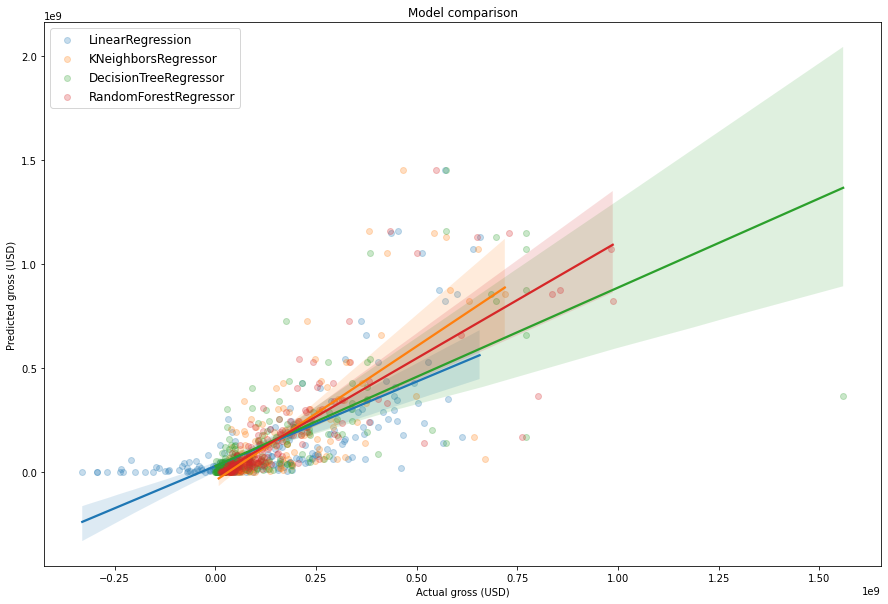

In [66]:
############# MODEL round 3 ###########

# set model number
m_num = 3

# describe the specifics

desc = 'LogTransformation & MinMaxScaler'

# run the model pipeline
prediction_scores, models_round_3, predictions_round_3 = model_predict(X_train_log_minmax_onehot,
                                                                       X_test_log_minmax_onehot,
                                                                       y_train,
                                                                       y_test,
                                                                       pred_scores=prediction_scores,
                                                                       m=m_num,
                                                                       k= 29,
                                                                       describe=desc)


## Models round 4: LogTransformation & StandardScaler & OneHotEncoder

In [67]:
# Some columns of X_train and X_test were log_transformed

scaler = StandardScaler().fit(X_train_num)
encoder = OneHotEncoder().fit(X_train_cat)
pickle.dump(scaler,open('standardscaler_4.p', 'wb'))
pickle.dump(encoder,open('onehotencoder_4.p', 'wb'))

In [68]:
def transform(dataframe):
    # This function assumes that you have initialized a scaler and an encoder, based on the training data
    cat = dataframe.select_dtypes(include = object)
    num = dataframe.select_dtypes(include = np.number)

    if not cat.empty:
        cat_transformed = encoder.transform(cat)
        cat_transformed = cat_transformed.toarray()
        cat_new = pd.DataFrame(data = cat_transformed, columns = encoder.get_feature_names_out())
    else: 
        cat_new = cat
    
    if not num.empty:
        num_transformed = scaler.transform(num)
        num_new = pd.DataFrame(data = num_transformed, columns = num.columns)
    else:
        num_new = num
    
    return pd.concat([cat_new, num_new], axis = 1)


In [69]:
X_train_log_standard_onehot = transform(X_train_log)
X_test_log_standard_onehot = transform(X_test_log)

In [70]:
# Choosing k for KNeighborsRegressor()

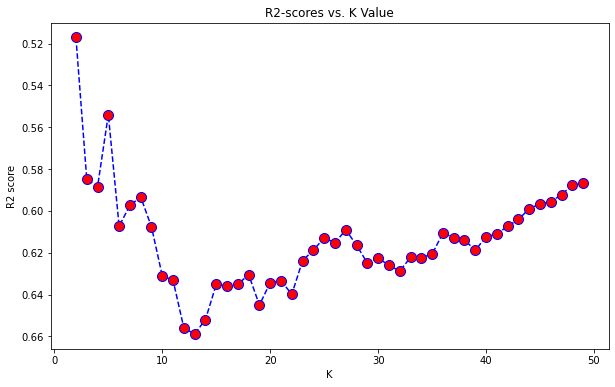

In [71]:
scores = []

for k in range(2,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_log_standard_onehot, y_train)
    scores.append(model.score(X_test_log_standard_onehot, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,50),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('R2 score')
plt.show()

# rule of thumb in choosing the number of k-neighbours:

#  we choose the 'elbow point' on this graph. That gives a pretty good variance-bias trade-off. 
# There is not much gain after that.

In [72]:
scores

[0.5170761237887448,
 0.5846405159365469,
 0.588523214301589,
 0.5539583056669801,
 0.6072716888255612,
 0.5973771151521499,
 0.5933454508260637,
 0.607643799725556,
 0.6310185797937566,
 0.6331716133652694,
 0.6559936845260086,
 0.6588209947929532,
 0.6519220778754641,
 0.6351153431057168,
 0.6358659805612791,
 0.6351113901346224,
 0.630419607650597,
 0.6450139668174306,
 0.6342340334267514,
 0.6333608255997946,
 0.6398644387907078,
 0.6237528313599074,
 0.6187336687357883,
 0.6128910198342764,
 0.6152141837833927,
 0.6090636636107671,
 0.6163647864442285,
 0.6249130407457957,
 0.6226020886942494,
 0.6259321613711526,
 0.6287655034744466,
 0.622216444436615,
 0.6223486212579787,
 0.6206664141955418,
 0.6105839295506629,
 0.6127286266909809,
 0.6138076495297384,
 0.6188799471585826,
 0.6122681667333116,
 0.6110450789621398,
 0.6072797803796874,
 0.6040824446424288,
 0.5988936205840116,
 0.5966509882630252,
 0.595621062195924,
 0.5921647946175114,
 0.5876184464956913,
 0.586781938568124

In [73]:
scores.index(0.6588209947929532) # 13 neighbours for KNN regressor

11

,Method,Round,MAE,MSE,RMSE,R2,R2_adj,Notes
0,LinearRegression,1,89866220,22862766785281220,151204387,0.637,0.479,MinMaxScaler
1,KNeighborsRegressor,1,92819625,28144132114586728,167762130,0.553,0.359,MinMaxScaler
2,DecisionTreeRegressor,1,93243351,38946590644446600,197348906,0.382,0.113,MinMaxScaler
3,RandomForestRegressor,1,74945733,21130919519642872,145364781,0.665,0.518,MinMaxScaler
4,LinearRegression,2,89856394,22865241880383384,151212572,0.637,0.479,StandardScaler
5,KNeighborsRegressor,2,71822912,22042492162106780,148467142,0.65,0.498,StandardScaler
6,DecisionTreeRegressor,2,105185263,39711633753790496,199277780,0.37,0.095,StandardScaler
7,RandomForestRegressor,2,72736176,21339437203624056,146080242,0.661,0.514,StandardScaler
8,LinearRegression,3,135998365,35735708538939208,189038907,0.433,0.186,LogTransformation & MinMaxScaler
9,KNeighborsRegressor,3,102032078,29956902546725304,173080624,0.524,0.317,LogTransformation & MinMaxScaler


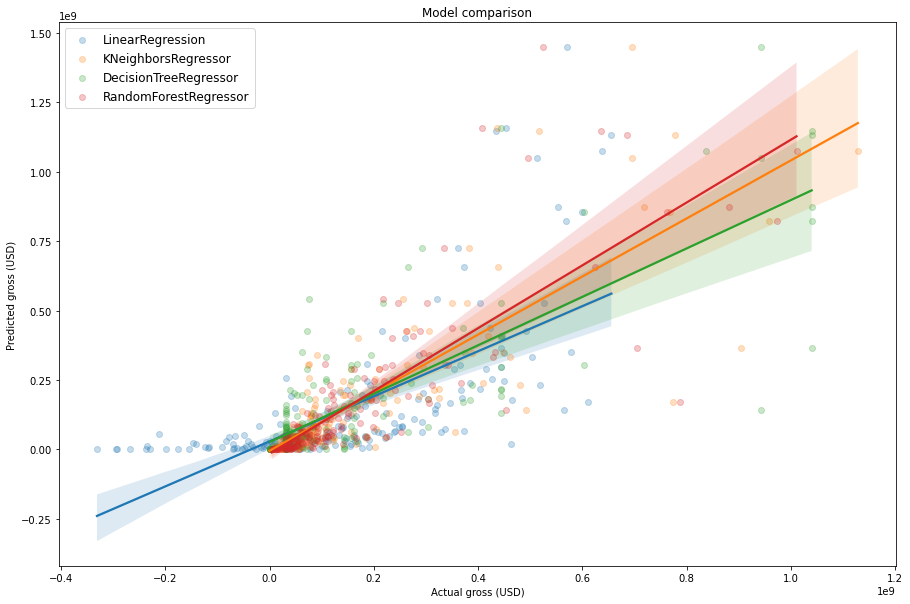

In [74]:
############# MODEL round 4 ###########

# set model number
m_num = 4

# describe the specifics

desc = 'LogTransformation & StandardScaler'

# run the model pipeline
prediction_scores, models_round_4, predictions_round_4 = model_predict(X_train_log_standard_onehot,
                                                                       X_test_log_standard_onehot,
                                                                       y_train,
                                                                       y_test,
                                                                       pred_scores=prediction_scores,
                                                                       m=m_num,
                                                                       k= 13,
                                                                       describe=desc)


# Picking the best performing model

In [75]:
display(prediction_scores.sort_values(by=['R2'], ascending=False))

,Method,Round,MAE,MSE,RMSE,R2,R2_adj,Notes
11,RandomForestRegressor,3,74322135,20895117469366208,144551435,0.668,0.524,LogTransformation & MinMaxScaler
3,RandomForestRegressor,1,74945733,21130919519642872,145364781,0.665,0.518,MinMaxScaler
15,RandomForestRegressor,4,74523065,21316848082297288,146002904,0.662,0.514,LogTransformation & StandardScaler
7,RandomForestRegressor,2,72736176,21339437203624056,146080242,0.661,0.514,StandardScaler
13,KNeighborsRegressor,4,79253816,21492442132672828,146603009,0.659,0.51,LogTransformation & StandardScaler
5,KNeighborsRegressor,2,71822912,22042492162106780,148467142,0.65,0.498,StandardScaler
0,LinearRegression,1,89866220,22862766785281220,151204387,0.637,0.479,MinMaxScaler
4,LinearRegression,2,89856394,22865241880383384,151212572,0.637,0.479,StandardScaler
14,DecisionTreeRegressor,4,88831193,24013455117779476,154962754,0.619,0.453,LogTransformation & StandardScaler
1,KNeighborsRegressor,1,92819625,28144132114586728,167762130,0.553,0.359,MinMaxScaler


In [76]:
# It is evident from the graphs that Linear regression produces negative predictions unlike other models.

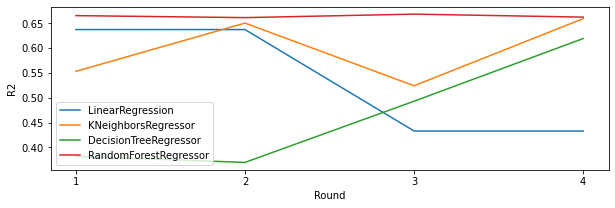

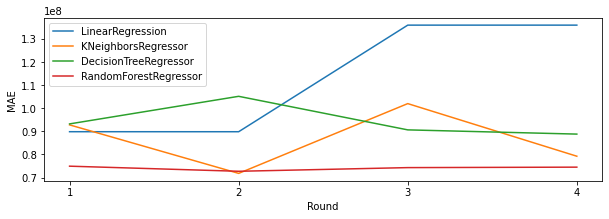

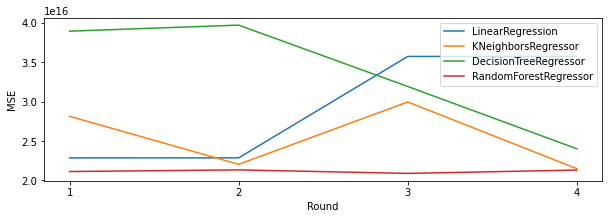

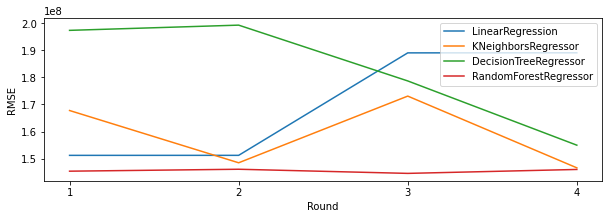

In [77]:
for i in ['R2','MAE','MSE','RMSE']:
    plt.subplots(figsize=(10,3))
    sns.lineplot(y=i,x='Round',hue='Method',data=prediction_scores)   
    plt.xticks(np.arange(1, max(prediction_scores.Round)+1, step=1))
    plt.legend(fontsize=10)
    plt.show()

# Random Forest Regressor with LogTransformation & MinMaxScaler

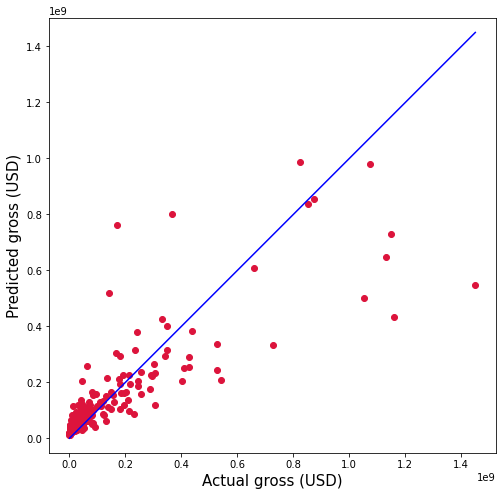

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions_round_3[3], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predictions_round_3[3]), max(y_test))
p2 = min(min(predictions_round_3[3]), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual gross (USD)', fontsize=15)
plt.ylabel('Predicted gross (USD)', fontsize=15)
plt.axis('equal')
plt.show()

In [79]:
# Bar plot y_test vs predictions_test

df = pd.DataFrame({'Actual gross (USD)': y_test, 'Predicted gross (USD)': predictions_round_3[3]})


,Actual gross (USD),Predicted gross (USD)
583,6.566328e+07,1.048570e+08
54,3.288282e+07,7.249210e+07
78,4.916959e+07,9.337284e+07
448,5.279659e+08,3.355541e+08
198,3.376679e+07,4.327881e+07
327,1.331358e+07,5.142314e+07
33,1.316472e+08,1.514109e+08
670,3.777046e+06,3.013368e+07
887,4.214040e+05,2.278440e+07
110,1.074149e+09,9.817125e+08


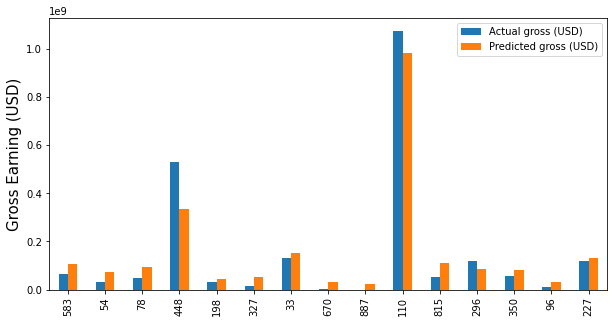

In [101]:
# by taking the 15 of them
df1 = df.sample(15)
display (df1)

#bar plot 
df1.plot(kind='bar',figsize=(10,5))
plt.ylabel('Gross Earning (USD)', fontsize=15)
plt.show()